<a href="https://colab.research.google.com/github/atman500/Atmane_K_mean/blob/main/socks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [16]:
uploaded=files.upload()

Saving stocks.csv to stocks (1).csv


In [17]:
df=pd.read_csv('stocks.csv',sep=';')
print(df.head())



         date   open   high    low  close    volume Name
0  08-02-2013  15.07  15.12  14.63  14.75   8407500  AAL
1  11-02-2013  14.89  15.01  14.26  14.46   8882000  AAL
2  12-02-2013  14.45  14.51  14.10  14.27   8126000  AAL
3  13-02-2013  14.30  14.94  14.25  14.66  10259500  AAL
4  14-02-2013  14.94  14.96  13.16  13.99  31879900  AAL


# Task
Analyze the stock trend for 'AAL' from the "stocks.csv" file by converting the 'date' column to datetime objects, calculating a 30-day rolling mean of the 'close' price, and visualizing the stock's closing price along with its rolling mean over time.

## Convert date column

### Subtask:
Convert the 'date' column to datetime objects to enable time-series analysis.


**Reasoning**:
Convert the 'date' column to datetime objects using the correct format string to enable time-series analysis, then verify the data type.



In [11]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df['date'].dtype)

datetime64[ns]


**Reasoning**:
The subtask of converting the 'date' column to datetime objects has been successfully completed. The next logical step is to filter the DataFrame to only include data for the stock 'AAL' as specified in the main task, which is a prerequisite for further analysis on this specific stock.



In [19]:
df_aal = df[df['Name'] == 'AAL'].copy()
print(df_aal.head())

         date   open   high    low  close    volume Name
0  08-02-2013  15.07  15.12  14.63  14.75   8407500  AAL
1  11-02-2013  14.89  15.01  14.26  14.46   8882000  AAL
2  12-02-2013  14.45  14.51  14.10  14.27   8126000  AAL
3  13-02-2013  14.30  14.94  14.25  14.66  10259500  AAL
4  14-02-2013  14.94  14.96  13.16  13.99  31879900  AAL


**Reasoning**:
Now that the DataFrame is filtered for 'AAL' stock, the next step is to calculate the 30-day rolling mean of the 'close' price as specified in the main task. This will add a new column to the `df_aal` DataFrame.



In [20]:
df_aal['rolling_mean'] = df_aal['close'].rolling(window=30).mean()
print(df_aal.head())

         date   open   high    low  close    volume Name  rolling_mean
0  08-02-2013  15.07  15.12  14.63  14.75   8407500  AAL           NaN
1  11-02-2013  14.89  15.01  14.26  14.46   8882000  AAL           NaN
2  12-02-2013  14.45  14.51  14.10  14.27   8126000  AAL           NaN
3  13-02-2013  14.30  14.94  14.25  14.66  10259500  AAL           NaN
4  14-02-2013  14.94  14.96  13.16  13.99  31879900  AAL           NaN


**Reasoning**:
Now that the 'rolling_mean' has been calculated, the next step is to visualize the stock's closing price and its 30-day rolling mean over time, as specified in the main task. This will involve plotting the 'date', 'close', and 'rolling_mean' columns from the `df_aal` DataFrame.



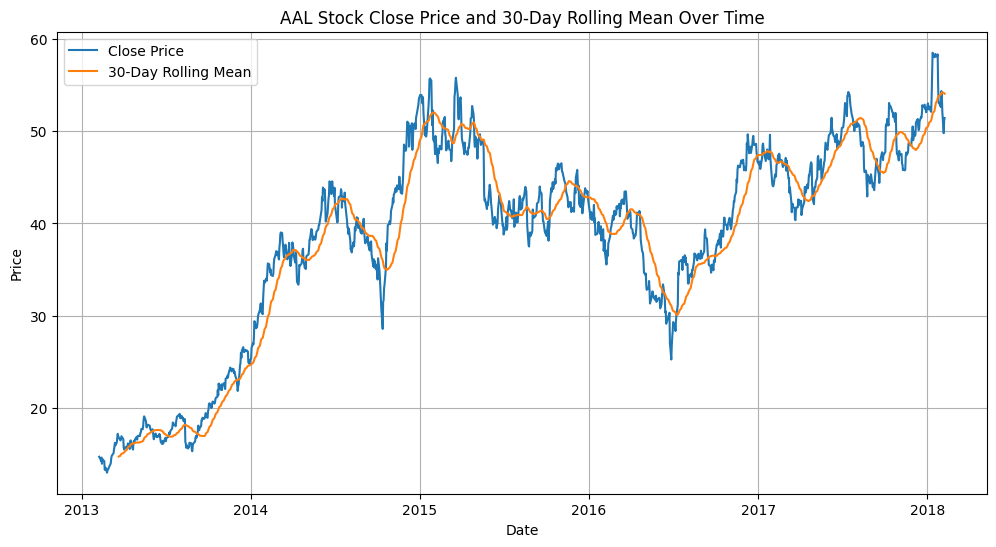

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=df_aal, label='Close Price')
sns.lineplot(x='date', y='rolling_mean', data=df_aal, label='30-Day Rolling Mean')
plt.title('AAL Stock Close Price and 30-Day Rolling Mean Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings
*   The 'date' column in the dataset was successfully converted to `datetime64[ns]` objects, enabling time-series analysis.
*   The analysis was focused on the stock 'AAL', with its data successfully filtered from the main DataFrame.
*   A 30-day rolling mean of the 'close' price was calculated for 'AAL' stock, providing a smoothed trend indicator.
*   A visualization was generated, effectively displaying 'AAL's closing price alongside its 30-day rolling mean over time, illustrating the stock's trend.

### Insights or Next Steps
*   The 30-day rolling mean helps to identify the underlying trend of 'AAL' stock by smoothing out short-term price fluctuations, making it easier to observe longer-term movements.
*   Further analysis could involve exploring other technical indicators (e.g., Bollinger Bands, MACD) or examining volume trends to gain deeper insights into 'AAL's stock performance and potential future movements.


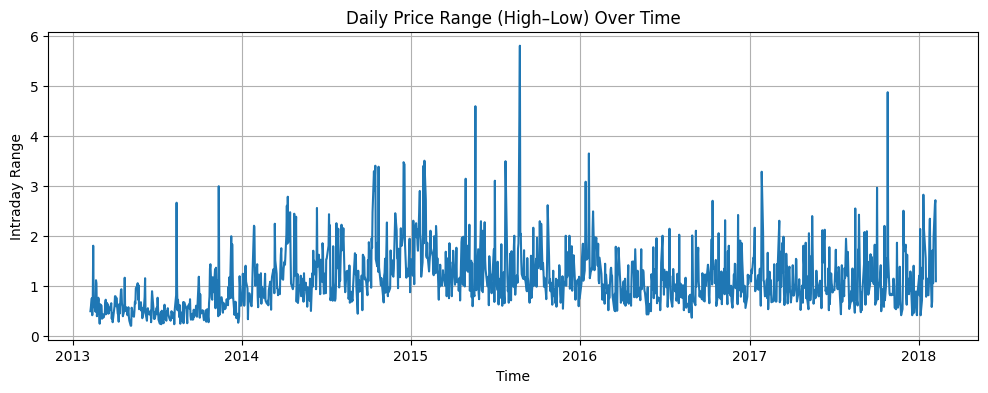

In [20]:
df_aal["range"] = df_aal["high"] - df_aal["low"]

plt.figure(figsize=(12,4))
plt.plot(df_aal["date"], df_aal["range"])
plt.title("Daily Price Range (High–Low) Over Time")
plt.xlabel("Time")
plt.ylabel("Intraday Range")
plt.grid(True)
plt.show()

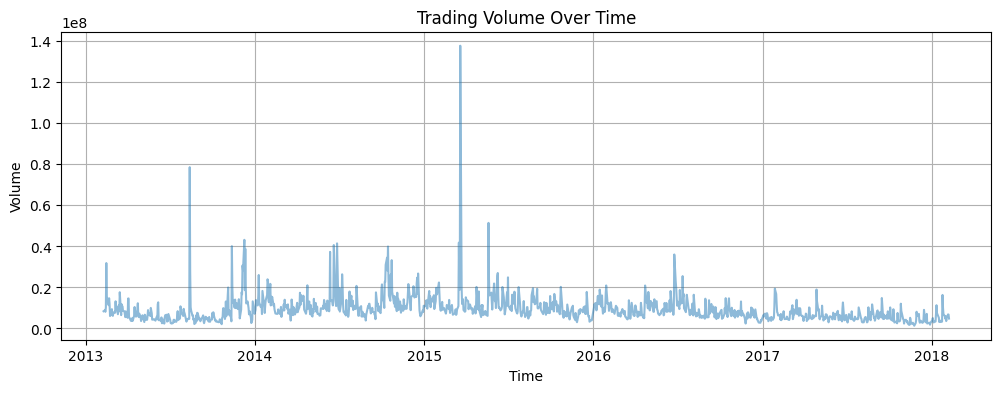

In [21]:
plt.figure(figsize=(12,4))
plt.plot(df_aal["date"], df_aal["volume"], alpha=0.5)
plt.title("Trading Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

In [37]:
df["return"] = df["close"].pct_change()
df["vol_chg"] = df["volume"].pct_change()

# Rolling features (non-smooth behavior often appears in volatility spikes)
df["ma_5"] = df["close"].rolling(5).mean()
df["ma_20"] = df["close"].rolling(20).mean()
df["std_20"] = df["return"].rolling(20).std()   # volatility proxy

# Target: next-day return
df["y"] = df["return"].shift(-1)

# Replace inf values with NaN before dropping rows
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs from rolling + shift and inf replacement
df = df.dropna().reset_index(drop=True)

features = ["return", "vol_chg", "ma_5", "ma_20", "std_20"]
X_raw = df[features].values
y_raw = df["y"].values

print("X:", X_raw.shape, "y:", y_raw.shape)

X: (618983, 5) y: (618983,)


In [38]:
n = len(df)
train_end = int(n * 0.70)
val_end   = int(n * 0.85)

X_train, y_train = X_raw[:train_end], y_raw[:train_end]
X_val,   y_val   = X_raw[train_end:val_end], y_raw[train_end:val_end]
X_test,  y_test  = X_raw[val_end:], y_raw[val_end:]

dates_train = df["date"].iloc[:train_end]
dates_val   = df["date"].iloc[train_end:val_end]
dates_test  = df["date"].iloc[val_end:]

print(X_train.shape, X_val.shape, X_test.shape)

(433288, 5) (92847, 5) (92848, 5)


In [39]:
def make_sequences(X, y, window=20):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

WINDOW = 20

Xtr, ytr = make_sequences(X_train, y_train, WINDOW)
Xva, yva = make_sequences(X_val, y_val, WINDOW)
Xte, yte = make_sequences(X_test, y_test, WINDOW)

# Align dates for sequences (drop first WINDOW dates)
dates_te_seq = dates_test.iloc[WINDOW:].reset_index(drop=True)

print(Xtr.shape, ytr.shape, Xte.shape, yte.shape)

(433268, 20, 5) (433268,) (92828, 20, 5) (92828,)


Greadient  Descenet


In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

tf.keras.utils.set_random_seed(42)

model = models.Sequential([
    layers.Input(shape=(WINDOW, Xtr.shape[2])),
    layers.LSTM(32),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # gradient-based
    loss="mse"
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 32)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,409 (21.13 KB)

 Trainable params: 5,409 (21.13 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
import numpy as np

# استبدال ±inf بـ NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# حذف الصفوف غير الصالحة
df = df.dropna().reset_index(drop=True)


In [43]:
Xtr_s = np.nan_to_num(Xtr_s, nan=0.0, posinf=0.0, neginf=0.0)
Xva_s = np.nan_to_num(Xva_s, nan=0.0, posinf=0.0, neginf=0.0)
Xte_s = np.nan_to_num(Xte_s, nan=0.0, posinf=0.0, neginf=0.0)


NameError: name 'Xtr_s' is not defined

In [32]:
features = ["return", "vol_chg", "ma_5", "ma_20", "std_20"]
X_raw = df[features].values
y_raw = df["y"].values


In [44]:
# فحص القيم غير الصالحة
import numpy as np

print("NaN in Xtr:", np.isnan(Xtr).any())
print("Inf in Xtr:", np.isinf(Xtr).any())
print("NaN in ytr:", np.isnan(ytr).any())
print("Inf in ytr:", np.isinf(ytr).any())


NaN in Xtr: False
Inf in Xtr: False
NaN in ytr: False
Inf in ytr: False


In [45]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    Xtr, ytr,
    validation_data=(Xva, yva),
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 155s 11ms/step - loss: 0.0027 - val_loss: 0.0038
Epoch 2/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 155s 11ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 3/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 210s 12ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 4/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 164s 12ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 5/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 151s 11ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 6/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 153s 11ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 7/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 202s 11ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 8/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 159s 12ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 9/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 195s 11ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 10/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 149s 11ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 11/50
13540/13540 ━━━━━━━━━━━━━━━━━━━━ 201s 11ms/step - loss: 0

In [46]:
best_val = min(history.history["val_loss"])
best_epoch = int(np.argmin(history.history["val_loss"])) + 1

print("Best epoch:", best_epoch)
print("Best val_loss:", f"{best_val:.10f}")


Best epoch: 3
Best val_loss: 0.0038108274


In [47]:
baseline_mse = (yva**2).mean()  # predict 0
print("Baseline val MSE:", f"{baseline_mse:.10f}")


Baseline val MSE: 0.0038107315


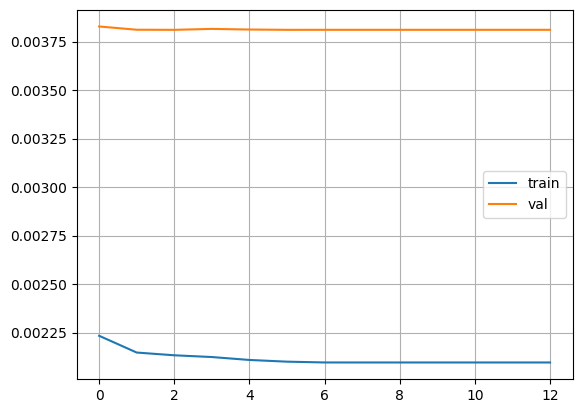

Best val_loss: 0.003810827387496829


In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend(); plt.grid(True); plt.show()

print("Best val_loss:", min(history.history["val_loss"]))
